# Import Data

In [8]:
import pandas as pd
import numpy as np 

In [9]:
data = pd.read_csv('Data/bbni_data_5y.csv')

In [10]:
data['date_str'] = pd.to_datetime(data['date_str'])

In [11]:
# rename columns
data = data.rename(columns={'date_str': 'date'})

In [12]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,3288.270208,3320.720243,3245.003495,3309.903564,48311000,0.0,0.0,2019-11-20
1,3299.086589,3342.353298,3255.819880,3331.536621,42079800,0.0,0.0,2019-11-21
2,3331.536921,3331.536921,3299.086886,3309.903564,21247000,0.0,0.0,2019-11-22
3,3299.087056,3309.903735,3234.186983,3245.003662,25178600,0.0,0.0,2019-11-25
4,3255.820341,3277.453699,3212.553625,3245.003662,73842800,0.0,0.0,2019-11-26


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          1213 non-null   float64       
 1   High          1213 non-null   float64       
 2   Low           1213 non-null   float64       
 3   Close         1213 non-null   float64       
 4   Volume        1213 non-null   int64         
 5   Dividends     1213 non-null   float64       
 6   Stock Splits  1213 non-null   float64       
 7   date          1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


In [14]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
date            0
dtype: int64

# Feature Engineering

In [15]:
data['Dividends'].value_counts()

Dividends
0.00000      1208
103.12054       1
22.01131        1
73.14845        1
196.39006       1
280.49518       1
Name: count, dtype: int64

In [16]:
data['Stock Splits'].value_counts()

Stock Splits
0.0    1211
2.0       2
Name: count, dtype: int64

In [17]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [18]:
# 1. Menghitung Return Harian
data['return'] = data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

In [19]:
# 2. Moving Averages
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['ma_20'] = data['Close'].rolling(window=20).mean()

In [20]:
# 3. Exponential Moving Average (EMA)
data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['ema_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [21]:
# 4. Bollinger Bands
data['bollinger_mid'] = data['Close'].rolling(window=20).mean()
data['bollinger_std'] = data['Close'].rolling(window=20).std()
data['bollinger_upper'] = data['bollinger_mid'] + (2 * data['bollinger_std'])
data['bollinger_lower'] = data['bollinger_mid'] - (2 * data['bollinger_std'])

In [22]:
# 10. Penambahan Fitur Waktu
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month

In [23]:
# Hapus data yang mengandung nilai NaN akibat perhitungan rolling
data = data.dropna().reset_index(drop=True)

In [24]:
data.head()

,Open,High,Low,Close,Volume,date,return,log_return,ma_5,ma_10,ma_20,ema_10,ema_20,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,3331.536621,3342.353298,3309.903266,3331.536621,45188200,2019-12-17,0.000000,0.000000,3296.923389,3276.371729,3270.963477,3290.321411,3283.007058,3270.963477,39.920722,3350.804920,3191.122033,1,12
1,3331.536729,3396.436795,3309.903373,3385.620117,84394000,2019-12-18,0.016234,0.016103,3322.883398,3293.678418,3274.749304,3307.648449,3292.779730,3274.749304,46.804623,3368.358550,3181.140059,2,12
2,3385.620117,3396.436795,3353.170084,3385.620117,38600800,2019-12-19,0.000000,0.000000,3348.843408,3309.903418,3277.453479,3321.825116,3301.621672,3277.453479,51.577264,3380.608006,3174.298952,3,12
3,3385.620389,3385.620389,3353.170354,3374.803711,37723600,2019-12-20,-0.003195,-0.003200,3361.823438,3319.638452,3280.698486,3331.457587,3308.591390,3280.698486,55.610263,3391.919013,3169.477960,4,12
4,3396.436929,3428.886963,3374.803572,3428.886963,45834400,2019-12-23,0.016026,0.015899,3381.293506,3334.781812,3289.892651,3349.172019,3320.048111,3289.892651,63.970625,3417.833902,3161.951401,0,12


In [25]:
data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
date               0
return             0
log_return         0
ma_5               0
ma_10              0
ma_20              0
ema_10             0
ema_20             0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
day_of_week        0
month              0
dtype: int64

# Modelling

## Preprocessing

In [26]:
dataUsed = data[['Close', 'Open']]

In [27]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
dataUsed['Close'] = scaler.fit_transform(dataUsed.Close.values.reshape(-1,1))
dataUsed['Open'] = scaler.fit_transform(dataUsed.Open.values.reshape(-1,1))

data_scaled = np.array(dataUsed)

data_scaled

C:\Users\thari\AppData\Local\Temp\ipykernel_20912\1216798107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUsed['Close'] = scaler.fit_transform(dataUsed.Close.values.reshape(-1,1))
C:\Users\thari\AppData\Local\Temp\ipykernel_20912\1216798107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUsed['Open'] = scaler.fit_transform(dataUsed.Open.values.reshape(-1,1))


array([[0.42342612, 0.42342611],
       [0.43533507, 0.42342613],
       [0.43533507, 0.43533505],
       ...,
       [0.76218885, 0.77540057],
       [0.75778494, 0.75998689],
       [0.75778494, 0.76218884]])

## Train Test Sequence

In [28]:
import numpy as np

sequence_length = 60
x = []
y = []

# Target tetap kolom 0 (harga close), tetapi kita hanya menggunakan kolom lain sebagai input
for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i, 0:])  
    y.append(data_scaled[i, 0]) 

# Konversi ke array numpy
x, y = np.array(x), np.array(y)


In [29]:
print(x.shape, y.shape)

(1134, 60, 2) (1134,)


## LSTM

In [30]:
from sklearn.model_selection import train_test_split

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [32]:
# LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# train model with early stopping
model.fit(x_train, y_train, epochs=30, batch_size=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
182/182 [==============================] - 12s 40ms/step - loss: 0.0059 - val_loss: 0.0028
Epoch 2/30
182/182 [==============================] - 8s 47ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 3/30
182/182 [==============================] - 8s 46ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 4/30
182/182 [==============================] - 8s 45ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 5/30
182/182 [==============================] - 8s 45ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 6/30
182/182 [==============================] - 8s 46ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 7/30
182/182 [==============================] - 8s 47ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/30
182/182 [==============================] - 9s 47ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 9/30
182/182 [==============================] - 9s 49ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/30
182/182 [==============================] - 9s 48ms/step - loss: 0.0011 - val_l

In [34]:
# prediction
predicted_prices =  model.predict(x_test)


8/8 [==============================] - 2s 31ms/step


In [35]:
# Dapatkan jumlah kolom yang diharapkan oleh scaler
expected_columns = scaler.min_.shape[0] 

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
predicted_prices_padded = np.hstack([np.zeros((predicted_prices.shape[0], expected_columns - 1)), predicted_prices])

# Inverse transform dan ambil hanya kolom harga 'Close'
predicted_prices = scaler.inverse_transform(predicted_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [36]:
# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
real_prices_padded = np.hstack([np.zeros((y_test.shape[0], expected_columns - 1)), y_test.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices = scaler.inverse_transform(real_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [37]:
real_prices_padded_train = np.hstack([np.zeros((y_train.shape[0], expected_columns - 1)), y_train.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices_train = scaler.inverse_transform(real_prices_padded_train)[:, -1]  # Ambil hanya kolom harga

# Evaluation

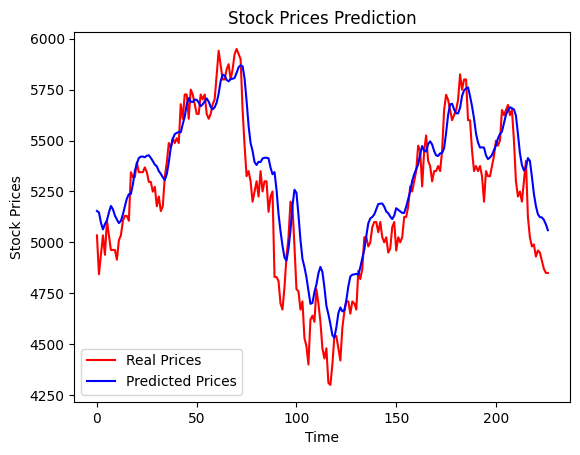

In [38]:
# conpare real and predicted prices
import matplotlib.pyplot as plt

plt.plot(real_prices, color='red', label='Real Prices')
plt.plot(predicted_prices, color='blue', label='Predicted Prices')
plt.title('Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [39]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['date'][-len(real_prices):], y=real_prices, mode='lines', name='Real Prices'))
fig.add_trace(go.Scatter(x=data['date'][-len(predicted_prices):], y=predicted_prices.reshape(-1), mode='lines', name='Predicted Prices'))

fig.update_layout(title='Stock Prices Prediction',
                     xaxis_title='Time',
                     yaxis_title='Stock Prices')

fig.show()



In [40]:
print("Real Prices: ", real_prices)
print("Predicted Prices: ", predicted_prices)
print("Difference: ", real_prices - predicted_prices)

Real Prices:  [5034.41262549 4843.53421332 4938.97366355 5034.41262549 4938.97366355
 5105.99172488 5034.41262549 4962.83303782 4962.83303782 4962.83303782
 4915.11380099 5010.55276293 5034.41262549 5105.99172488 5129.85158743
 5129.85158743 5105.99172488 5344.58986215 5320.7299996  5320.7299996
 5392.30909898 5344.58986215 5344.58986215 5344.58986215 5368.44923643
 5344.58986215 5296.87013704 5296.87013704 5249.15041193 5273.01027449
 5177.57131254 5225.29054937 5153.71144999 5177.57131254 5320.7299996
 5392.30909898 5487.74806093 5463.88868665 5511.60792348 5487.74806093
 5511.60792348 5487.74806093 5678.62647309 5607.04737371 5726.3461982
 5726.3461982  5607.04737371 5750.20557248 5726.3461982  5678.62647309
 5630.90674798 5630.90674798 5726.3461982  5702.48633565 5726.3461982
 5630.90674798 5607.04737371 5630.90674798 5678.62647309 5702.48633565
 5821.78516015 5941.08398465 5869.50488526 5800.00000456 5800.00000456
 5850.00000304 5875.00000228 5800.00000456 5850.00000304 5925.00000

In [41]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
rmse

163.09566743045764

In [42]:
# calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real_prices, predicted_prices)
mae

125.90318662945641

Directional Accuracy adalah metrik yang digunakan untuk mengukur seberapa baik model memprediksi arah perubahan harga (naik atau turun) dibandingkan dengan nilai aktual. Ini adalah metrik yang sangat berguna dalam prediksi saham karena dalam banyak kasus, arah perubahan harga lebih penting daripada nilai absolut dari harga itu sendiri—terutama jika tujuannya adalah untuk membuat keputusan beli atau jual.

In [43]:
# direction accuracy
direction_accuracy = np.mean(np.sign(real_prices[1:] - real_prices[:-1]) == np.sign(predicted_prices[1:] - predicted_prices[:-1]))
direction_accuracy

0.4424778761061947

# Save Model

In [44]:
# # Save the entire model
# model.save('Model/lstm_model_bbni.h5')


# Close Only

In [97]:
data_used = data.filter(['Close'])

dataset = data_used.values

training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

956

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.42342612],
       [0.43533507],
       [0.43533507],
       ...,
       [0.76218885],
       [0.75778494],
       [0.75778494]])

In [99]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.42342612, 0.43533507, 0.43533507, 0.43295334, 0.44486223,
       0.44724406, 0.44486223, 0.43771685, 0.43057157, 0.43295334,
       0.41628085, 0.40913551, 0.39722652, 0.42342612, 0.42580796,
       0.43057157, 0.43771685, 0.4210444 , 0.42342612, 0.43057157,
       0.40913551, 0.41151724, 0.41628085, 0.41866262, 0.42342612,
       0.39960835, 0.40199007, 0.39008124, 0.38055412, 0.37579051,
       0.36864518, 0.39008124, 0.39722652, 0.39008124, 0.39008124,
       0.3876994 , 0.38531763, 0.38293585, 0.39484484, 0.40675368,
       0.41628085, 0.42342612, 0.43057157, 0.44486223, 0.43057157,
       0.41151724, 0.40437196, 0.38531763, 0.36388157, 0.35911802,
       0.3523691 , 0.35727678, 0.37199978, 0.35973065, 0.31801559,
       0.24440083, 0.2468547 , 0.23213176, 0.18305531, 0.18305531])]
[0.16489697608024145]

[array([0.42342612, 0.43533507, 0.43533507, 0.43295334, 0.44486223,
       0.44724406, 0.44486223, 0.43771685, 0.43057157, 0.43295334,
       0.41628085, 0.40913551, 0.39

In [100]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=5, epochs=30)

Epoch 1/30
180/180 [==============================] - 8s 23ms/step - loss: 0.0056
Epoch 2/30
180/180 [==============================] - 4s 23ms/step - loss: 0.0012
Epoch 3/30
180/180 [==============================] - 4s 23ms/step - loss: 9.3536e-04
Epoch 4/30
180/180 [==============================] - 4s 22ms/step - loss: 8.8276e-04
Epoch 5/30
180/180 [==============================] - 4s 21ms/step - loss: 6.1371e-04
Epoch 6/30
180/180 [==============================] - 4s 21ms/step - loss: 5.7155e-04
Epoch 7/30
180/180 [==============================] - 4s 21ms/step - loss: 5.7944e-04
Epoch 8/30
180/180 [==============================] - 4s 24ms/step - loss: 4.6225e-04
Epoch 9/30
180/180 [==============================] - 4s 24ms/step - loss: 5.1187e-04
Epoch 10/30
180/180 [==============================] - 4s 22ms/step - loss: 4.4355e-04
Epoch 11/30
180/180 [==============================] - 4s 21ms/step - loss: 3.9455e-04
Epoch 12/30
180/180 [==============================] - 4s 21

In [101]:
test_data = scaled_data[training_data_len - 60: , :]
print(len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


298
8/8 [==============================] - 1s 21ms/step


In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test = dataset[training_data_len:, :]
test = predictions[:-1, 0]

rmse = np.sqrt(np.mean(predictions - y_test)**2)
mae = mean_absolute_error(predictions, y_test)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  29.837779838497898
MAE:  74.8341608127626


C:\Users\thari\AppData\Local\Temp\ipykernel_20912\1510546548.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



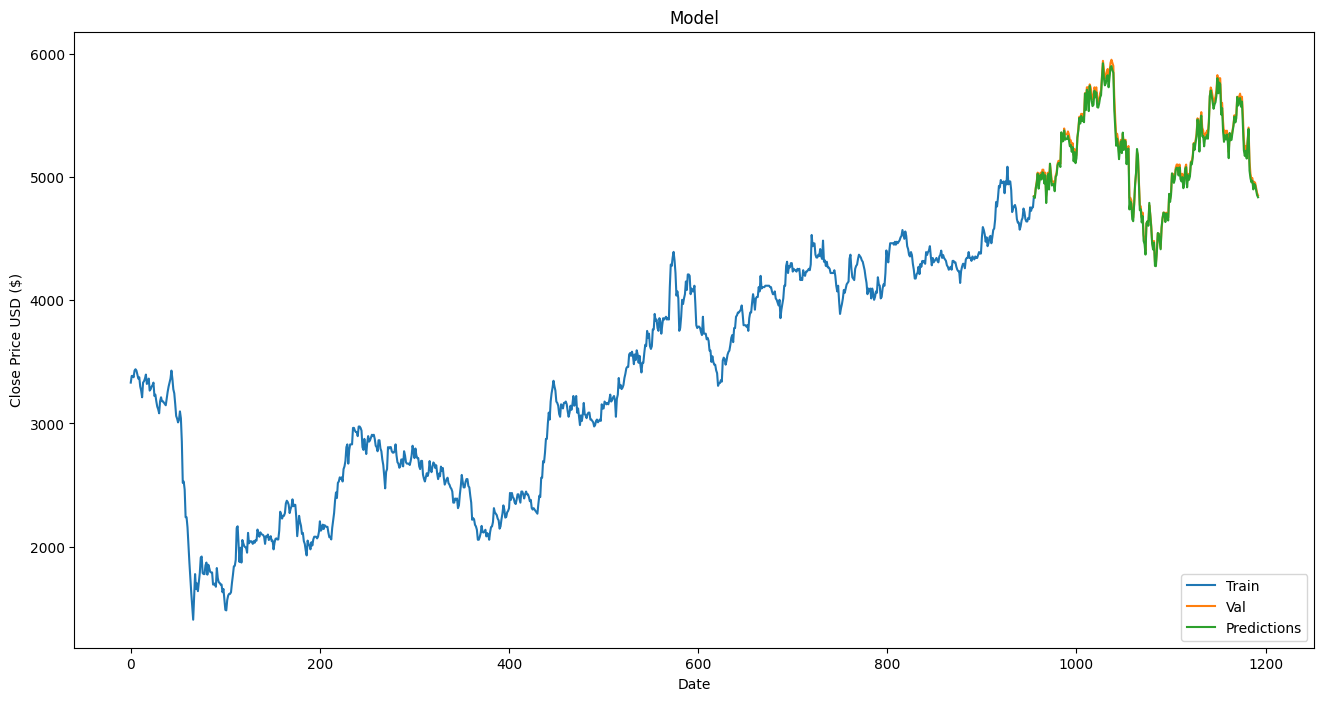

In [103]:
train = data[:training_data_len]
# ambil data dari training_data_len sampai akhir -1
valid = data[training_data_len-1:-1]  # Ambil 1 baris sebelum training_data_len dan hilangkan baris terakhir
valid['Predictions'] = predictions[:, 0]  # Predictions harus sesuai panjang dengan valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [104]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news sentiment siebert

In [105]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed

C:\Users\thari\AppData\Local\Temp\ipykernel_20912\412406848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-17,3331.536621
2019-12-18,3385.620117
2019-12-19,3385.620117
2019-12-20,3374.803711
2019-12-23,3428.886963
...,...
2024-11-14,4950.000000
2024-11-15,4910.000000
2024-11-18,4870.000000


In [106]:
news = pd.read_csv('Data/bbni sentiment analysis.csv')
# delete columns except date and sentiment and title
news = news[['publish_date', 'sentiment', 'title']]
news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

# hanya gunakan data diatas tanggal 2019-12-17

news = news[news.index >= '2019-12-17']

news

,sentiment,title
date,,
2024-11-11 12:45:00,NEGATIVE,Berapa Harga Saham BBCA Hari Ini?
2024-11-08 15:15:00,NEGATIVE,Dua Mata Pisau Penghapusan Utang UMKM
2024-11-06 13:44:00,NEGATIVE,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa..."
2024-11-05 08:13:00,POSITIVE,IHSG Hari Ini Diramal Bergerak Fluktuatif
2024-10-29 08:30:00,POSITIVE,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ..."
...,...,...
2020-03-10 15:05:00,POSITIVE,Mampukah Buyback 12 BUMN Rp 8 T Selamatkan Pas...
2020-03-10 11:18:00,NEGATIVE,Alasan 12 BUMN Buyback Saham Rp 8 T
2020-03-10 10:45:00,POSITIVE,12 BUMN Siap Buyback Saham Rp 8 T


In [107]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()


In [108]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,sentiment,title
date,,,
2019-12-17,3331.536621,NaN,NaN
2019-12-18,3385.620117,NaN,NaN
2019-12-19,3385.620117,NaN,NaN
2019-12-20,3374.803711,NaN,NaN
2019-12-23,3428.886963,NaN,NaN
...,...,...,...
2024-11-14,4950.000000,NaN,NaN
2024-11-15,4910.000000,NaN,NaN
2024-11-18,4870.000000,NaN,NaN


In [109]:
# cari data title yang ada di news dan tidak ada di dfMerge

news[~news.index.isin(dfMerge.index)]

# cari tanggal terdekat yang ada di dfMerge berdasar data yang ada di news dan tidak ada di dfMerge

,sentiment,title
date,,
2020-09-27,POSITIVE,Mau Cuan Minggu Depan? Cek Nih 6 Rekomendasi S...
2021-04-04,POSITIVE,"Intip Laba Bersih 10 Bank Terbesar RI, Siapa T..."
2021-04-25,NEGATIVE,"AEON Mall Sentul City Dijual Rp 1,9 T, Buat Apa?"
2021-10-17,POSITIVE,Asal Muasal Rumor BNI Akuisisi Bank
2021-10-31,POSITIVE,BNI Gandeng fishOn Dorong Ekspor Perikanan Mau...
2022-01-30,POSITIVE,"Torehkan Kinerja Excellence, BNI Terus Didoron..."
2022-04-16,POSITIVE,"BNI Ekspansi Green Banking Korporasi Rp 6,1 Tr..."
2022-05-04,POSITIVE,BNI Fasilitasi Kegiatan Ekspor-Impor 200.000 D...
2022-05-05,POSITIVE,Nasabah di Amerika Ungkap Dukungan BNI untuk U...


In [110]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                  Close sentiment title
2019-12-17  3331.536621       NaN   NaN
2019-12-18  3385.620117       NaN   NaN
2019-12-19  3385.620117       NaN   NaN
2019-12-20  3374.803711       NaN   NaN
2019-12-23  3428.886963       NaN   NaN
...                 ...       ...   ...
2024-11-14  4950.000000       NaN   NaN
2024-11-15  4910.000000       NaN   NaN
2024-11-18  4870.000000       NaN   NaN
2024-11-19  4850.000000       NaN   NaN
2024-11-20  4850.000000       NaN   NaN

[1201 rows x 3 columns]


sentiment
POSITIVE    149
NEGATIVE     51
Name: count, dtype: int64

In [111]:
# Pastikan kolom 'title' di dfMerge tidak memiliki NaN untuk perbandingan
dfMerge_titles = dfMerge['title'].dropna()

# Filter berita di news yang tidak ada di dfMerge berdasarkan 'title'
missing_news = news[~news['title'].isin(dfMerge_titles)]

# Tampilkan hasil
print(missing_news)

dfMerge['sentiment'].value_counts()


Empty DataFrame
Columns: [sentiment, title, nearest_date]
Index: []


sentiment
POSITIVE    149
NEGATIVE     51
Name: count, dtype: int64

In [112]:
print(dfMerge['sentiment'].unique())

dfMerge['sentiment'] = dfMerge['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': -1}).fillna(0)

print(dfMerge['sentiment'].unique())

dfMerge['sentiment'].value_counts()

[nan 'POSITIVE' 'NEGATIVE']
[ 0.  1. -1.]


sentiment
 0.0    1001
 1.0     149
-1.0      51
Name: count, dtype: int64

In [113]:
# Contoh data sentimen
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data


array([[0.42342612, 0.5       ],
       [0.43533507, 0.5       ],
       [0.43533507, 0.5       ],
       ...,
       [0.76218885, 0.5       ],
       [0.75778494, 0.5       ],
       [0.75778494, 0.5       ]])

In [114]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [115]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30
180/180 [==============================] - 8s 24ms/step - loss: 0.0064
Epoch 2/30
180/180 [==============================] - 5s 29ms/step - loss: 0.0011
Epoch 3/30
180/180 [==============================] - 6s 33ms/step - loss: 9.1981e-04
Epoch 4/30
180/180 [==============================] - 5s 27ms/step - loss: 9.3690e-04
Epoch 5/30
180/180 [==============================] - 4s 23ms/step - loss: 7.0334e-04
Epoch 6/30
180/180 [==============================] - 4s 21ms/step - loss: 6.7629e-04
Epoch 7/30
180/180 [==============================] - 4s 22ms/step - loss: 6.3886e-04
Epoch 8/30
180/180 [==============================] - 4s 24ms/step - loss: 4.3468e-04
Epoch 9/30
180/180 [==============================] - 5s 30ms/step - loss: 4.0153e-04
Epoch 10/30
180/180 [==============================] - 5s 26ms/step - loss: 4.3156e-04
Epoch 11/30
180/180 [==============================] - 4s 22ms/step - loss: 4.6595e-04
Epoch 12/30
180/180 [==============================] - 4s 22

In [116]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 1s 37ms/step


In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  103.88639332565872
MAE:  92.60830201221114


C:\Users\thari\AppData\Local\Temp\ipykernel_20912\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



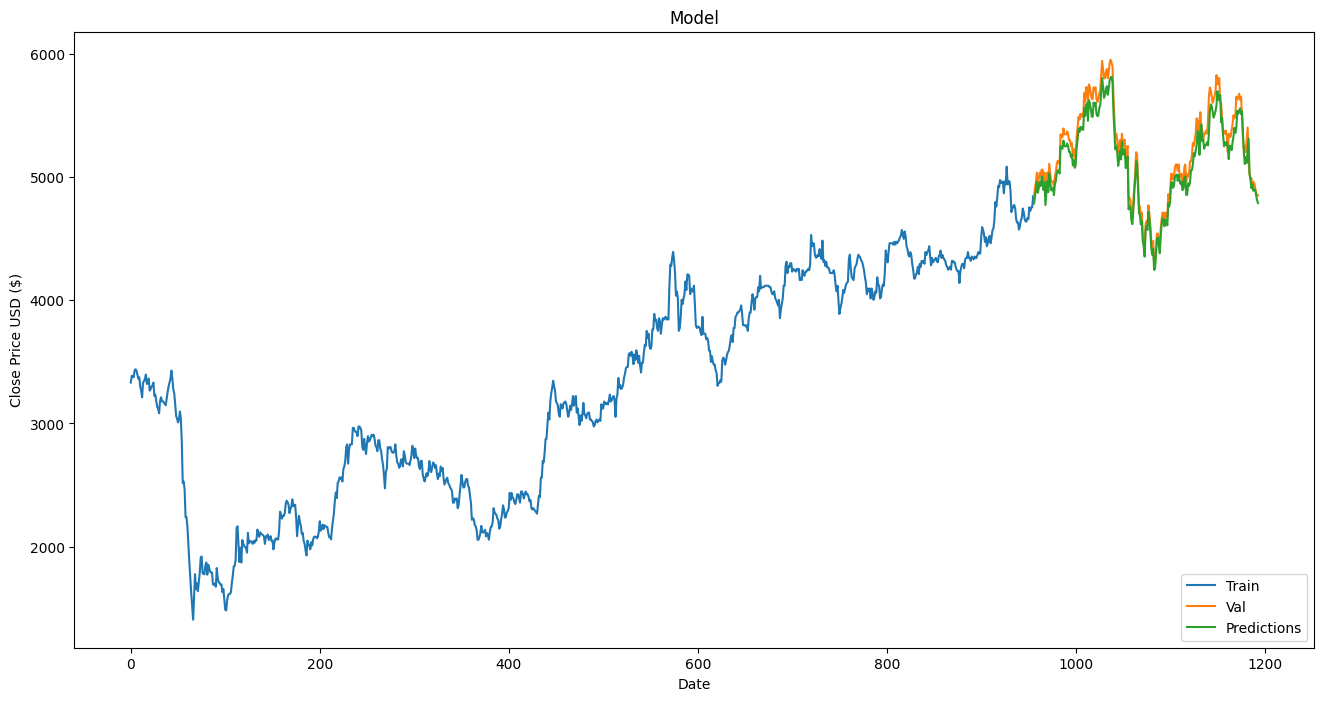

In [118]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [119]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news manual sentiment

In [120]:
# Define a mapping for Indonesian weekdays and months to English equivalents
indonesian_weekdays = {
    "Senin": "Monday", "Selasa": "Tuesday", "Rabu": "Wednesday",
    "Kamis": "Thursday", "Jumat": "Friday", "Sabtu": "Saturday", "Minggu": "Sunday"
}
indonesian_months = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", "Mei": "May",
    "Jun": "Jun", "Jul": "Jul", "Agu": "Aug", "Sep": "Sep", "Okt": "Oct",
    "Nov": "Nov", "Des": "Dec"
}


In [121]:
import pandas as pd


news = pd.read_csv('Data/bbni - manual.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

c:\Users\thari\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning:

tzname WIB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



,title,sentiment
date,,
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,positif
2024-11-08 15:15:00,Dua Mata Pisau Penghapusan Utang UMKM,negatif
2024-11-06 13:44:00,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa...",negatif
2024-11-05 08:13:00,IHSG Hari Ini Diramal Bergerak Fluktuatif,negatif
2024-10-29 08:30:00,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ...",negatif
...,...,...
2020-03-10 15:05:00,Mampukah Buyback 12 BUMN Rp 8 T Selamatkan Pas...,positif
2020-03-10 11:18:00,Alasan 12 BUMN Buyback Saham Rp 8 T,positif
2020-03-10 10:45:00,12 BUMN Siap Buyback Saham Rp 8 T,negatif


In [122]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed


C:\Users\thari\AppData\Local\Temp\ipykernel_20912\2178100794.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-17,3331.536621
2019-12-18,3385.620117
2019-12-19,3385.620117
2019-12-20,3374.803711
2019-12-23,3428.886963
...,...
2024-11-14,4950.000000
2024-11-15,4910.000000
2024-11-18,4870.000000


In [123]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()

In [124]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-12-17,3331.536621,NaN,NaN
2019-12-18,3385.620117,NaN,NaN
2019-12-19,3385.620117,NaN,NaN
2019-12-20,3374.803711,NaN,NaN
2019-12-23,3428.886963,NaN,NaN
...,...,...,...
2024-11-14,4950.000000,NaN,NaN
2024-11-15,4910.000000,NaN,NaN
2024-11-18,4870.000000,NaN,NaN


In [125]:
dfMerge['sentiment'].value_counts()

sentiment
positif    143
negatif     29
Name: count, dtype: int64

In [126]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                  Close title sentiment
2019-12-17  3331.536621   NaN       NaN
2019-12-18  3385.620117   NaN       NaN
2019-12-19  3385.620117   NaN       NaN
2019-12-20  3374.803711   NaN       NaN
2019-12-23  3428.886963   NaN       NaN
...                 ...   ...       ...
2024-11-14  4950.000000   NaN       NaN
2024-11-15  4910.000000   NaN       NaN
2024-11-18  4870.000000   NaN       NaN
2024-11-19  4850.000000   NaN       NaN
2024-11-20  4850.000000   NaN       NaN

[1201 rows x 3 columns]


sentiment
positif    170
negatif     30
Name: count, dtype: int64

In [127]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
 0.0    1001
 1.0     170
-1.0      30
Name: count, dtype: int64

In [128]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.42342612, 0.5       ],
       [0.43533507, 0.5       ],
       [0.43533507, 0.5       ],
       ...,
       [0.76218885, 0.5       ],
       [0.75778494, 0.5       ],
       [0.75778494, 0.5       ]])

In [129]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [130]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30
180/180 [==============================] - 12s 39ms/step - loss: 0.0053
Epoch 2/30
180/180 [==============================] - 7s 39ms/step - loss: 0.0012
Epoch 3/30
180/180 [==============================] - 7s 40ms/step - loss: 9.9139e-04
Epoch 4/30
180/180 [==============================] - 7s 41ms/step - loss: 9.0414e-04
Epoch 5/30
180/180 [==============================] - 7s 40ms/step - loss: 7.0440e-04
Epoch 6/30
180/180 [==============================] - 7s 41ms/step - loss: 5.6189e-04
Epoch 7/30
180/180 [==============================] - 7s 40ms/step - loss: 4.9201e-04
Epoch 8/30
180/180 [==============================] - 7s 41ms/step - loss: 4.8954e-04
Epoch 9/30
180/180 [==============================] - 7s 42ms/step - loss: 4.9687e-04
Epoch 10/30
180/180 [==============================] - 7s 38ms/step - loss: 4.9737e-04
Epoch 11/30
180/180 [==============================] - 7s 41ms/step - loss: 5.0456e-04
Epoch 12/30
180/180 [==============================] - 7s 4

In [131]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 1s 24ms/step


In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  64.87152417679829
MAE:  51.72189305409664


C:\Users\thari\AppData\Local\Temp\ipykernel_20912\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



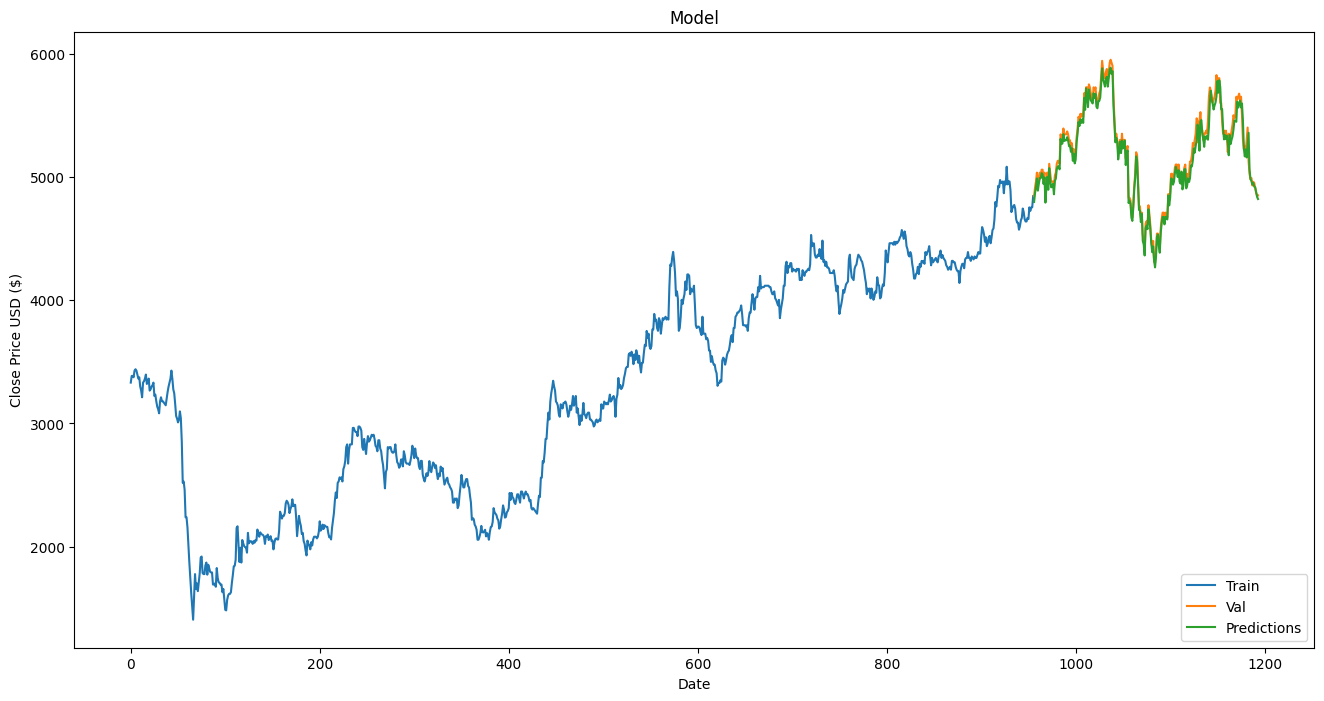

In [133]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [134]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news body sentiment

In [135]:
import pandas as pd


news = pd.read_csv('Data/BBNI DAVIN  - BBNI ISI.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

c:\Users\thari\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning:

tzname WIB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



,title,sentiment
date,,
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,negatif
2024-11-08 15:15:00,Dua Mata Pisau Penghapusan Utang UMKM,negatif
2024-11-06 13:44:00,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa...",negatif
2024-11-05 08:13:00,IHSG Hari Ini Diramal Bergerak Fluktuatif,positif
2024-10-29 08:30:00,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ...",positif
...,...,...
2020-03-10 15:05:00,Mampukah Buyback 12 BUMN Rp 8 T Selamatkan Pas...,positif
2020-03-10 11:18:00,Alasan 12 BUMN Buyback Saham Rp 8 T,positif
2020-03-10 10:45:00,12 BUMN Siap Buyback Saham Rp 8 T,positif


In [136]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed


C:\Users\thari\AppData\Local\Temp\ipykernel_20912\2178100794.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-17,3331.536621
2019-12-18,3385.620117
2019-12-19,3385.620117
2019-12-20,3374.803711
2019-12-23,3428.886963
...,...
2024-11-14,4950.000000
2024-11-15,4910.000000
2024-11-18,4870.000000


In [137]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()

In [138]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-12-17,3331.536621,NaN,NaN
2019-12-18,3385.620117,NaN,NaN
2019-12-19,3385.620117,NaN,NaN
2019-12-20,3374.803711,NaN,NaN
2019-12-23,3428.886963,NaN,NaN
...,...,...,...
2024-11-14,4950.000000,NaN,NaN
2024-11-15,4910.000000,NaN,NaN
2024-11-18,4870.000000,NaN,NaN


In [139]:
dfMerge['sentiment'].value_counts()

sentiment
positif    132
negatif     40
Name: count, dtype: int64

In [140]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                  Close title sentiment
2019-12-17  3331.536621   NaN       NaN
2019-12-18  3385.620117   NaN       NaN
2019-12-19  3385.620117   NaN       NaN
2019-12-20  3374.803711   NaN       NaN
2019-12-23  3428.886963   NaN       NaN
...                 ...   ...       ...
2024-11-14  4950.000000   NaN       NaN
2024-11-15  4910.000000   NaN       NaN
2024-11-18  4870.000000   NaN       NaN
2024-11-19  4850.000000   NaN       NaN
2024-11-20  4850.000000   NaN       NaN

[1201 rows x 3 columns]


sentiment
positif    160
negatif     40
Name: count, dtype: int64

In [141]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
 0.0    1001
 1.0     160
-1.0      40
Name: count, dtype: int64

In [142]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.42342612, 0.5       ],
       [0.43533507, 0.5       ],
       [0.43533507, 0.5       ],
       ...,
       [0.76218885, 0.5       ],
       [0.75778494, 0.5       ],
       [0.75778494, 0.5       ]])

In [143]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [144]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30
180/180 [==============================] - 12s 41ms/step - loss: 0.0028
Epoch 2/30
180/180 [==============================] - 7s 41ms/step - loss: 8.6941e-04
Epoch 3/30
180/180 [==============================] - 7s 40ms/step - loss: 7.2134e-04
Epoch 4/30
180/180 [==============================] - 7s 39ms/step - loss: 6.5947e-04
Epoch 5/30
180/180 [==============================] - 7s 39ms/step - loss: 4.9220e-04
Epoch 6/30
180/180 [==============================] - 7s 40ms/step - loss: 4.4314e-04
Epoch 7/30
180/180 [==============================] - 7s 40ms/step - loss: 5.1993e-04
Epoch 8/30
180/180 [==============================] - 7s 41ms/step - loss: 4.6428e-04
Epoch 9/30
180/180 [==============================] - 7s 39ms/step - loss: 4.3777e-04
Epoch 10/30
180/180 [==============================] - 7s 40ms/step - loss: 4.5297e-04
Epoch 11/30
180/180 [==============================] - 7s 41ms/step - loss: 3.5206e-04
Epoch 12/30
180/180 [==============================] - 

In [145]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 1s 42ms/step


In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  82.21733917846504
MAE:  70.68314034598214


C:\Users\thari\AppData\Local\Temp\ipykernel_20912\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



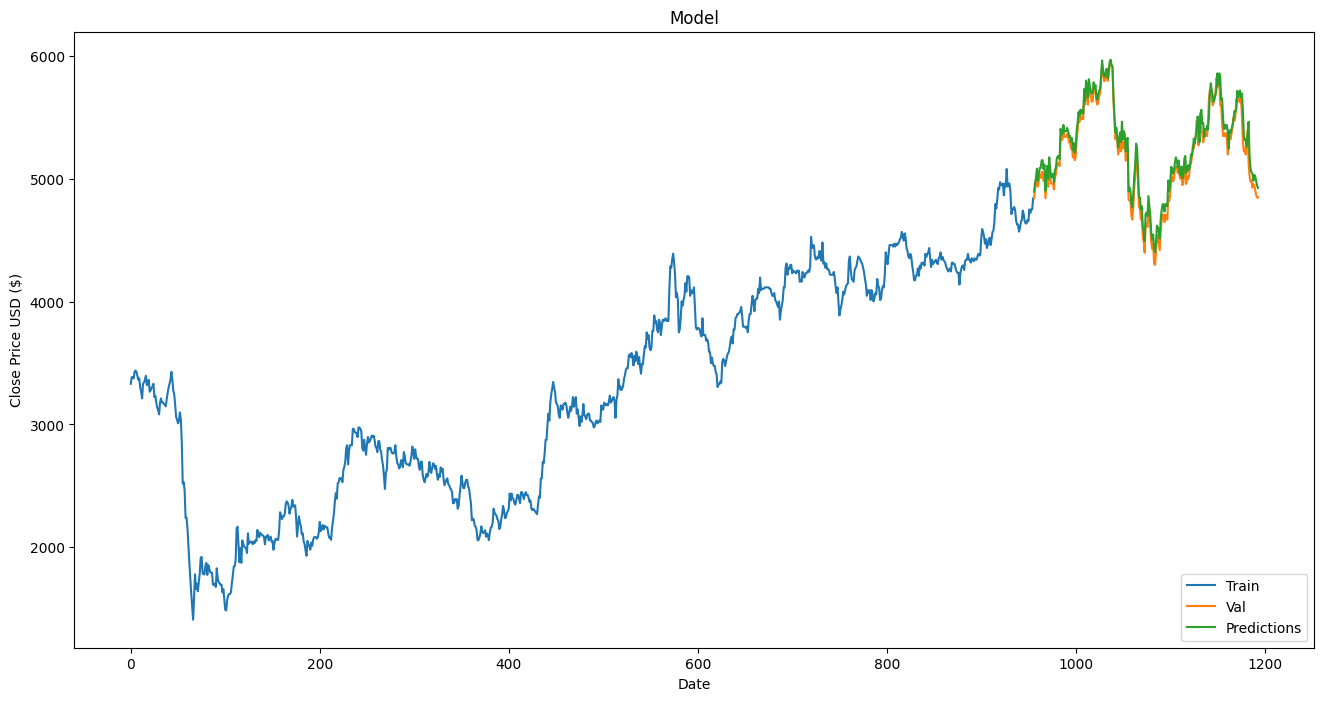

In [147]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [148]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# END